# Activity: Advanced EDA & Data Preprocessing

**Overview**:
In this activity, we'll embark on an in-depth exploration of the renowned Titanic dataset, diving into advanced exploratory data analysis (EDA) and essential data preprocessing techniques. The Titanic dataset offers a rich canvas, capturing the details of passengers aboard the ill-fated ship.

**Objective**:
Our primary goal is to understand the underlying patterns and relationships in the data, ensuring it's clean, consistent, and prepared for further analysis or modeling. Through this hands-on experience, participants will gain practical insights into the intricacies of data analysis and the significance of preprocessing in the data science pipeline.

**What We will Do**:
1. **Advanced EDA**:
   - Classify variables by type (Continuous, Discrete, Categorical, ID).
   - Explore categorical variables with visual tools.
   - Investigate outliers and comprehend their impact.
   - Dive into data distributions, focusing on skewness.

2. **Data Preprocessing**:
   - Address missing values, ensuring data completeness.
   - Optionally, participants can engage in multivariate analysis and apply transformations like log transformation to certain features.

## 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Dataset

In [2]:
# Load the Titanic dataset from the data folder
titanic_data = pd.read_csv('../data/titanic.csv')

## 3. Exploratory Data Analysis (EDA)

### 1. Quick Refresher on the Titanic Dataset

- Revisit the Initial Entries

In [3]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- Dataset Dimensions Check

In [4]:
titanic_data.shape

(891, 12)

### 2. Check the Dataset Information and Summary

In [5]:
# Display data types and non-null values
print("\nData info:")
print(titanic_data.info())


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
# Calculate summary statistics for numerical variables
print("\nSummary statistics for numerical variables:")
titanic_data.describe()


Summary statistics for numerical variables:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Calculate summary statistics for categorical variables
print("\nSummary statistics categorical variables:")
titanic_data.describe(include=['object'])


Summary statistics categorical variables:


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 4. Identifying Variables by Type 

- **Objective:** To categorize the variables in the Titanic dataset into Continuous, Discrete, Categorical, and ID types.

#### 1. Continuous Variables

In [8]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- By examining the summary statistics for numerical columns, we can identify variables with a wide range of values and no clear steps as continuous.

- `Age` and `Fare` are continuous variables in the Titanic dataset. Both these variables can have numerous unique values across a range.

#### 2. Discrete Variables

- For the 'SibSp' column as an example

In [9]:
titanic_data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

- Discrete variables have a countable number of unique values.

Discrete variables in the dataset are : 
- `Survived`
- `Pclass`
- `SibSp` (number of siblings/spouses aboard)
- `Parch` (number of parents/children aboard) 

- Disply the distinct values for each discrete variable:

In [10]:
Discrete_columns = ['Survived', 'Pclass', 'SibSp', 'Parch']

for col in Discrete_columns:
    print(f'Variable Name: {col}')
    print(titanic_data[col].value_counts())
    print('------------------------------')

Variable Name: Survived
Survived
0    549
1    342
Name: count, dtype: int64
------------------------------
Variable Name: Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
------------------------------
Variable Name: SibSp
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
------------------------------
Variable Name: Parch
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
------------------------------


#### 3. Categorical Variables

In [11]:
titanic_data.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

- Categorical variables are often non-numeric and have a limited set of values. However, sometimes numeric columns with a limited number of unique values can also be categorical.

- `Sex`, `Embarked`, `Cabin`, and `Ticket` are categorical variables. 

- **Note:** 
    - While `Pclass` (representing ticket class) is a numeric attribute, its restricted set of unique values (1, 2, 3) qualifies it as a categorical variable.
    - Similarly, the `Survived` column, despite being numeric with values 0 and 1, represents categorical classes of survival status, making it a categorical variable as well.

#### 4. ID Variables

- Assuming 'PassengerId' as the ID column

In [12]:
titanic_data['PassengerId'].nunique() == len(titanic_data)

True

- ID variables have a unique value for each observation or row.

- `PassengerId` is an ID variable in the Titanic dataset. It uniquely identifies each passenger.



### 5. Exploring Categorical Variables

- **Objective:** To understand the distribution and relationships of categorical variables in the Titanic dataset.

#### 1. Visualizing with Count Plots

- Visualizing 'Sex' as an example:

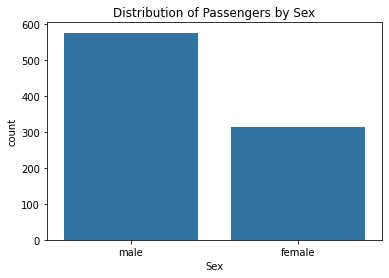

In [13]:
# Visualizing 'Sex' as an example:
sns.countplot(x='Sex', data=titanic_data)
plt.title('Distribution of Passengers by Sex')
plt.show()

From the plot, we can observe the distribution of male and female passengers. This helps to understand the demographic makeup of the passengers.

- males dominate the 'Sex' column. 

Explore the other categorical columns to see which categories are most prevalent.

#### 2. Explore Relationships Using Crosstabs

- Crosstab between 'Sex' and 'Survived':

In [14]:
# Crosstab between 'Sex' and 'Survived':
ct = pd.crosstab(titanic_data['Sex'], titanic_data['Survived'])
print(ct)

Survived    0    1
Sex               
female     81  233
male      468  109


The crosstab display the count of passengers who survived and didn't survive, segmented by their gender. This gives a perspective on how survival rates differ between male and female passengers.

#### For advanced exploration

- Visualizing the crosstab with a heatmap:

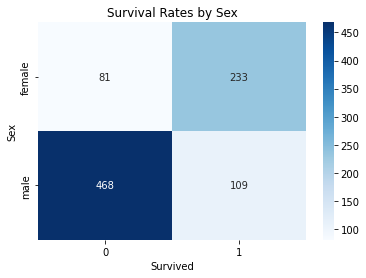

In [15]:
# Visualizing the crosstab with a heatmap:
sns.heatmap(ct, annot=True, cmap='Blues', fmt='d')
plt.title('Survival Rates by Sex')
plt.show()


Females had a higher survival rate than males. This pattern might be indicative of the "women and children first" protocol during the ship's evacuation. The heatmap and crosstab offer insights into this trend.

### 6. Investigating Outliers

- **Objective:** To detect and understand outliers in the Titanic dataset and their potential impact on machine learning models.

#### 1. The Significance of Outliers

Outliers can skew the data distribution and potentially influence model predictions, especially for models like linear regression that are sensitive to extreme values. An outlier can shift the mean and standard deviation of a dataset, affecting the assumptions and outcomes of statistical tests.

#### 2. Detecting Outliers using IQR

The Interquartile Range (IQR) is a statistical measure that represents the spread or dispersion of data within a dataset.

It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1).

The IQR helps identify outliers by defining a range within which the majority of data points lie. Any data point outside this range is considered a potential outlier.

The IQR is used in outlier detection because it is robust to extreme values and provides a more robust measure of spread compared to the range or standard deviation.

Values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] are considered potential outliers because this range is based on the IQR and represents the "middle 50%" of the data, where the majority of data points are located.

The 1.5 multiplier is a common threshold used to identify values that significantly deviate from the median of the data. Values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered potential outliers because they fall outside the typical range of variation within the dataset. These potential outliers may indicate data points that are unusual or require further investigation.

- For `Age` column

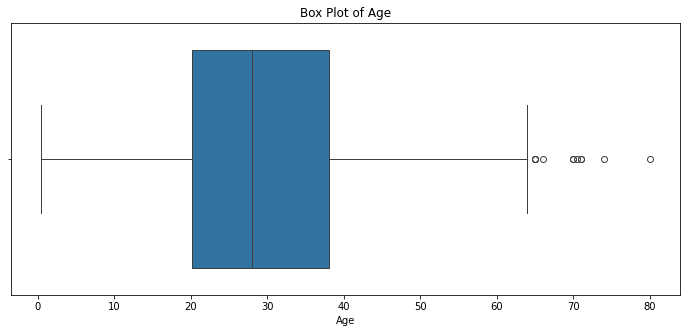

In [16]:
# Create box plots for Age
plt.figure(figsize=(12, 5))
sns.boxplot(data=titanic_data, x='Age')
plt.title('Box Plot of Age')
plt.show()

In [17]:
# Calculate the IQR for Age column
Q1_age = titanic_data['Age'].quantile(0.25)
Q3_age = titanic_data['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define the lower and upper bounds for potential outliers
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age


print(f"Outliers for Age: Values below {lower_bound_age} and above {upper_bound_age}")

Outliers for Age: Values below -6.6875 and above 64.8125


In [18]:
# Identify potential outliers data for Age
outliers_age = titanic_data[(titanic_data['Age'] < lower_bound_age) | (titanic_data['Age'] > upper_bound_age)]
outliers_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


- For `Fare` column

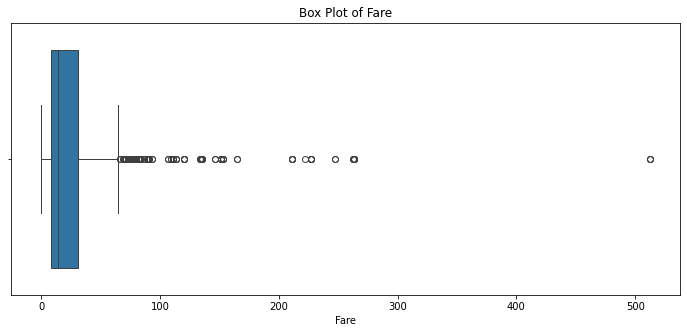

In [19]:
# Create box plots for Fare
plt.figure(figsize=(12, 5))
sns.boxplot( data=titanic_data, x='Fare')
plt.title('Box Plot of Fare')
plt.show()

In [20]:
# Calculate the IQR for Fare column
Q1_fare = titanic_data['Fare'].quantile(0.25)
Q3_fare = titanic_data['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Define the lower and upper bounds for potential outliers
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

print(f"Outliers for Fare: Values below {lower_bound_fare} and above {upper_bound_fare}")

Outliers for Fare: Values below -26.724 and above 65.6344


In [21]:
# Identify potential outliers for Fare
outliers_fare = titanic_data[(titanic_data['Fare'] < lower_bound_fare) | (titanic_data['Fare'] > upper_bound_fare)]
outliers_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


**Implications of Detected Outliers :**

- **Age Outliers:** The outliers in the `Age` column might represent passengers with extreme ages, such as infants or elderly individuals. These outliers could have unique characteristics or needs during emergency situations on the Titanic. Understanding their presence could provide insights into the survival rates and strategies for different age groups.

- **Fare Outliers:** Outliers in the `Fare` column likely indicate passengers who paid significantly higher fares than the majority. These passengers might have had access to more luxurious accommodations or other privileges on the ship. Investigating these outliers could shed light on the socio-economic distribution of passengers and its impact on their survival.

- **Impact on Analysis:** In data analysis and modeling, handling outliers is crucial. Depending on the goals of our analysis, we might choose to treat or remove outliers differently. For example, when predicting survival rates, we might want to investigate how the presence of age or fare outliers affects model accuracy and fairness.

- **Data Integrity:** Identifying outliers is also essential for data integrity. Outliers can sometimes be due to data entry errors or anomalies, and addressing them can improve the overall quality of the dataset.

In summary, understanding the potential implications of outliers helps us make informed decisions during data analysis and modeling and ensures the accuracy and reliability of our insights and predictions.

Using the IQR technique to detect outliers in the `Age` and `Fare` columns provides valuable insights into the distribution and variability of these variables. By identifying potential outliers, we can:

- Understand whether there are extreme values that might influence our analysis.
- Assess the overall spread of data within these columns.
- Make informed decisions about how to handle these outliers, such as whether to remove them or apply specific data preprocessing techniques.
- Gain a deeper understanding of the central tendency and variability of the data, which is essential for accurate analysis and modeling.

### 7. Investigating Skewness

- **Objective:** 
To understand and detect skewness in the distribution of variables within the Titanic dataset.

#### 1. Grasping the Concept of Skewness

Skewness is a crucial statistical measure because many machine learning algorithms, especially linear-based ones, assume that input features have a normal (or Gaussian) distribution. Highly skewed features might violate this assumption, potentially leading to suboptimal model performance.

#### 2. Visualizing Skewness - Histograms and KDE Plots

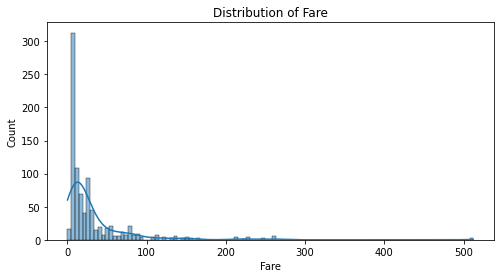

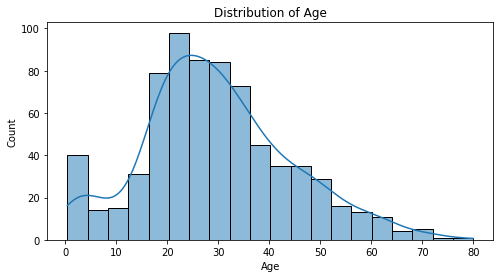

In [22]:
# Histogram and KDE for 'Fare'
plt.figure(figsize=(8, 4))
sns.histplot(titanic_data['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

# Histogram and KDE for 'Age'
plt.figure(figsize=(8, 4))
sns.histplot(titanic_data['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

Skewness is a measure of the asymmetry of a distribution. When we look at the distribution of data in the Titanic dataset, particularly the `Fare` and `Age` columns, the skewness can provide insights into the nature of the data distribution.

- The `Fare` and `Age1` distribution seem to be positively skewed due to its right tail.

#### 2. Quantifying Skewness

Now, let's quantify the skewness of these columns:

In [23]:
fare_skewness = titanic_data['Fare'].skew()
age_skewness = titanic_data['Age'].skew()

print(f"Skewness of Fare: {fare_skewness}")
print(f"Skewness of Age: {age_skewness}")

Skewness of Fare: 4.787316519674893
Skewness of Age: 0.38910778230082704


#### **Observations:**

Based on the visualizations and calculations:

- The `Fare` column is positively skewed, implying that most passengers paid a relatively low fare, with a few paying exceptionally high fares.
- The `Age` column may show a slight positive skew, indicating that the majority of passengers are younger, with fewer older passengers aboard.

Skewness might affect a machine learning model by biasing its predictions, especially if that model is sensitive to data distributions. For instance, linear regression, which assumes a normal distribution of residuals (errors), can produce inefficient and biased estimators if the independent variables are highly skewed.

## Data Preprocessing

### 1. Handling Missing Values

- **Objective:**
Identify and handle missing values in the Titanic dataset to prepare the data for modeling.

#### 1. Understanding the Impact of Missing Values

**Discussion:** Missing data might arise due to various reasons such as recording errors, unavailability of information, or other systemic issues. Depending on whether the absence of data is random or systematic, it might introduce bias into our analyses or predictive models.

#### 2. Identifying Missing Values

let's determine the percentage of missing data for each column:

In [24]:
missing_data_count = titanic_data.isnull().sum()
missing_data_percentage = (titanic_data.isnull().sum() / len(titanic_data)) * 100

print(missing_data_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


- `Cabin` Column  have a significant percentage of missing data in the Titanic dataset. A plausible reason is that cabin details might not have been recorded for all passengers, especially those in the lower classes. 
- Similarly, `Age` might be missing for some passengers because it was either not recorded or unknown.

#### 3. Addressing Missing Values

For columns with more than 70% missing data, it might be more informative to drop them entirely since imputation could introduce significant bias. For other columns with fewer missing values, imputation can be a good approach.

##### `Cabin` Column:

**Strategy:** Drop the column due to a high percentage of missing values.

**Explanation:**
The `Cabin` column has a significant percentage of missing values. When a column has a vast majority of its values missing, imputing those values can introduce significant bias or noise into the dataset. Additionally, the cabin information might not have been systematically recorded, leading to random missingness. Given that over 70% of the data in this column is missing and the difficulty in accurately imputing such a high volume of missing values, it is more prudent to drop the column altogether.

In [25]:
titanic_data.drop(columns=['Cabin'], inplace=True)
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


#### **`Age` Column**


**Strategy:** Use the mean to impute missing values.

**Explanation:**

The `Age` column in the Titanic dataset is numerical. When choosing an imputation method for a numerical variable, we look at the distribution of the data. If the distribution is roughly symmetric (low skewness) and the mean is approximately equal to the median, then the mean can be a good choice for imputation because it doesn't introduce significant bias. On the other hand, if the data were highly skewed, the median might be a more appropriate choice.

Using the mean for `Age` makes sense here because:

- The skewness is relatively low.
- The mean is roughly equivalent to the median, indicating a balanced distribution.
- Imputing with the mean preserves the overall distribution of ages in the dataset.

In [26]:
print(f"Skewness of Age: {titanic_data['Age'].skew()}")
print(f"Mean of Age: {titanic_data['Age'].mean()}")
print(f"Median of Age: {titanic_data['Age'].median()}")

titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

Skewness of Age: 0.38910778230082704
Mean of Age: 29.69911764705882
Median of Age: 28.0


#### **`Embarked` Column**

**Strategy:** Use the mode to impute missing values.

**Explanation:**

The `Embarked` column is categorical, representing the port at which passengers boarded the Titanic. For categorical columns, the mode (most frequently occurring value) is a common choice for imputation. Using the mode ensures that we are filling missing values with the most common category, thus not introducing significant variability.

In [27]:
mode_embarked = titanic_data['Embarked'].mode()[0]
print(f"Mode of Embarked: {mode_embarked}")
titanic_data['Embarked'].fillna(mode_embarked, inplace=True)

Mode of Embarked: S


#### Review

After handling the missing values, it's vital to review the dataset:

In [28]:
print(titanic_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### **Reflection:** 

When handling missing values, it's important to understand the potential impacts on further analyses or modeling. Deleting columns might lead to loss of information, while imputation might introduce some biases. It's crucial to understand the trade-offs and validate any models or analyses post-processing.

## Download the Titanic dataset Directly to Your Local Machine

In [30]:
titanic_data.to_csv('../data/titanic_preprocessed.csv', index=False)

The `index=False` parameter ensures that the DataFrame's index is not saved to the CSV file. This is typically desirable unless you have a specific reason to keep the index.

This will save the `titanic_preprocessed.csv` file in the `data` directory of your current working directory. If the directory does not exist, you might need to create it first or adjust the path to a directory that does exist.

## Optional tasks

### 1. Multivariate Analysis 

- **Objective:**
Dive deeper into the relationships and patterns between multiple variables simultaneously. This helps in understanding the interactions between different features and their collective impact on the dataset's outcomes.

#### 1. Interaction Between Categorical & Continuous Variables

Investigate how the fare varied across different embarkation ports and passenger classes.

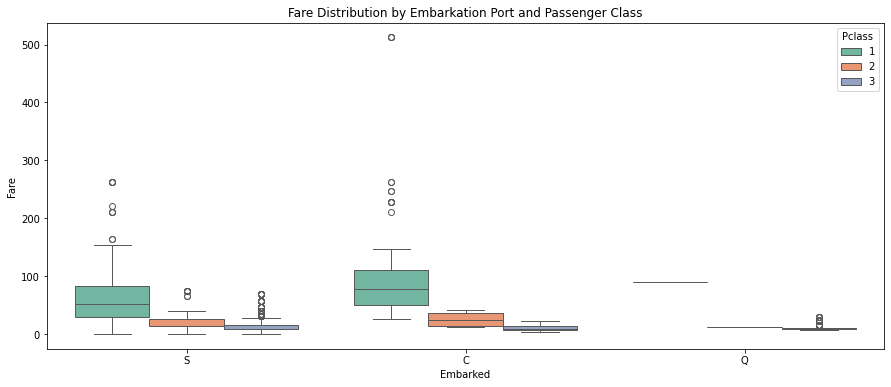

In [31]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=titanic_data, palette = 'Set2')
plt.title('Fare Distribution by Embarkation Port and Passenger Class')
plt.show()

This boxplot visualizes the fare distributions based on embarkation ports (C = Cherbourg; Q = Queenstown; S = Southampton) and passenger classes (1st, 2nd, 3rd class). From this, we can observe the median fare and fare spread for each category, helping understand how fare varied with port and class.

#### 2. Factor Plot for Higher Dimensional Data

<Figure size 1080x576 with 0 Axes>

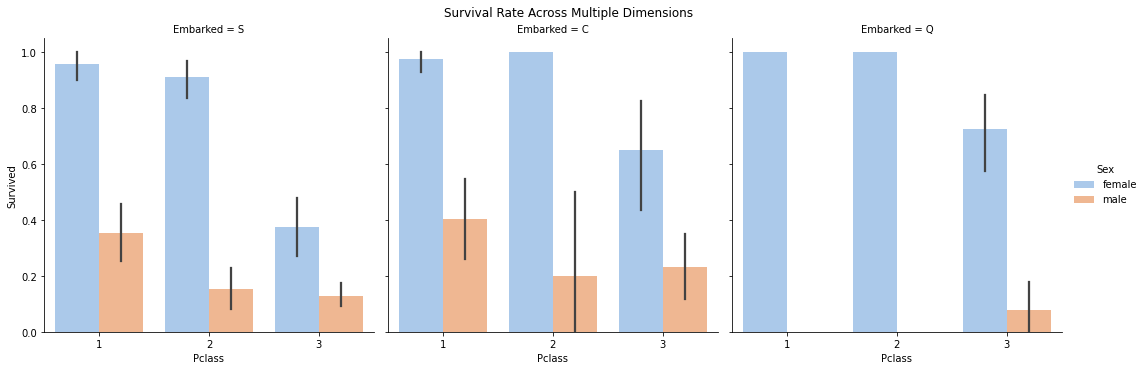

In [32]:
plt.figure(figsize=(15, 8))
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=titanic_data, kind='bar', palette = 'pastel')
plt.suptitle('Survival Rate Across Multiple Dimensions', y=1.02)
plt.show()

The factor plot (now commonly referred to as a catplot in Seaborn) visualizes the survival rate across multiple dimensions. Each column represents an embarkation port, with bars showing survival rates for each passenger class, differentiated by gender. This provides insights into how survival rates varied depending on the combination of class, gender, and embarkation port.

#### 3. Visualizing Age Distribution for Survival Status Stratified by Gender:

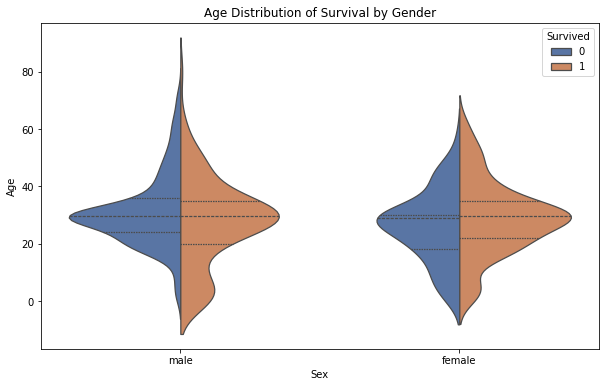

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_data, split=True, inner='quartile', palette="deep")
plt.title('Age Distribution of Survival by Gender')
plt.show()

A violin plot combines aspects of a box plot with a kernel density plot, providing insights into the distribution of data.

The violin plot displays the distribution of ages for males and females, split by survival status (Survived=0 indicating "Did not survive" and Survived=1 indicating "Survived"). The split view allows us to compare the age distribution of survivors and non-survivors side-by-side for each gender. The inner quartile lines provide additional insight into the distribution's central tendency and spread.

From the visualization, one might infer patterns like:

1. A noticeable amount of young males survived compared to older ones.
2. For females, age distribution among survivors seems more uniform, but more adult females survived compared to young females.

This visualization provides a deeper understanding of the interplay between age, gender, and survival status on the Titanic, helping to reveal nuanced patterns and trends in the data.

### 2. Log Transformation (Optional – Advanced) 

- **Objective:** 
Transform the `Fare` column using a log transformation to stabilize its variance and produce a more normal distribution.

To address potential issues with the skewed distributions, a log transformation can be applied to columns like `Fare` to make their distribution more normal-like. The transformation can help in certain modeling scenarios where normality is an assumption.

First, let's apply the transformation:

In [34]:
# Applying log transformation (adding 1 to handle zero fares using log1p)
titanic_data['Log_Fare'] = np.log1p(titanic_data['Fare'])

Next, let's visualize the results:

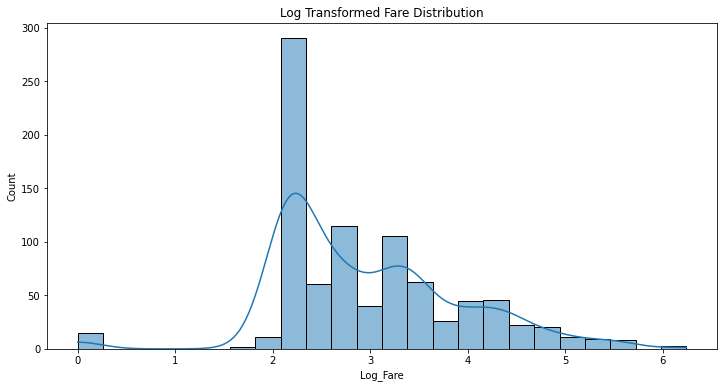

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(titanic_data['Log_Fare'], kde=True)
plt.title('Log Transformed Fare Distribution')
plt.show()

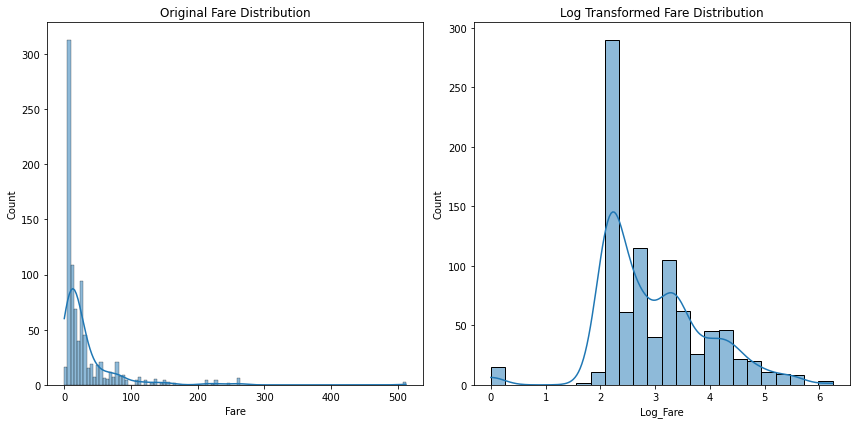

In [36]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(titanic_data['Fare'], kde=True)
plt.title('Original Fare Distribution')

plt.subplot(1, 2, 2)
sns.histplot(titanic_data['Log_Fare'], kde=True)
plt.title('Log Transformed Fare Distribution')

plt.tight_layout()
plt.show()

From the visualizations, it's evident that the log transformation of the `Fare` column has adjusted the data's distribution to be more symmetric and bell-shaped. The original `Fare` column has a long tail on the right, indicating it's positively skewed. By applying the log transformation, this skewness is reduced, and the distribution looks more normal. This transformation can help in subsequent analysis and modeling where normal distribution assumptions apply.